In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

import functions as f
import classes as c

In [9]:
mnist_data = fetch_mldata("MNIST original")
X, y = mnist_data["data"], mnist_data["target"]
for i in range(len(X)):
    if i%1000 == 0:
        print("i =", i)
    for j in range(len(X[i])):
        if X[i, j] < 120 and X[i, j] != 0:
            X[i, j] = 0
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train_btmaps = X_train.reshape(-1, 28, 28)
random_index = np.random.choice(len(X_train_btmaps), size=4)

C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


i = 0
i = 1000
i = 2000
i = 3000
i = 4000
i = 5000
i = 6000
i = 7000
i = 8000
i = 9000
i = 10000
i = 11000
i = 12000
i = 13000
i = 14000
i = 15000
i = 16000
i = 17000
i = 18000
i = 19000
i = 20000
i = 21000
i = 22000
i = 23000
i = 24000
i = 25000
i = 26000
i = 27000
i = 28000
i = 29000
i = 30000
i = 31000
i = 32000
i = 33000
i = 34000
i = 35000
i = 36000
i = 37000
i = 38000
i = 39000
i = 40000
i = 41000
i = 42000
i = 43000
i = 44000
i = 45000
i = 46000
i = 47000
i = 48000
i = 49000
i = 50000
i = 51000
i = 52000
i = 53000
i = 54000
i = 55000
i = 56000
i = 57000
i = 58000
i = 59000
i = 60000
i = 61000
i = 62000
i = 63000
i = 64000
i = 65000
i = 66000
i = 67000
i = 68000
i = 69000


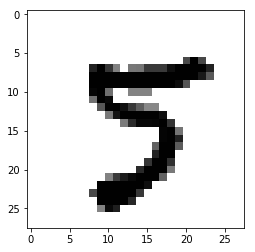

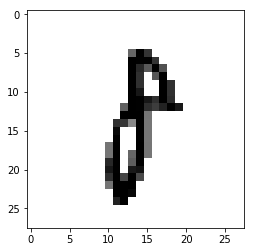

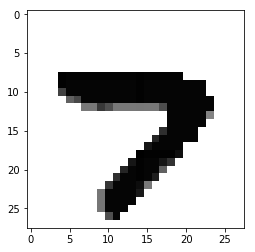

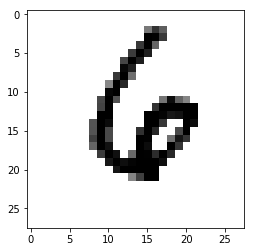

In [10]:
for i, bitmap in enumerate(X_train_btmaps[random_index]):
    plt.figure(i)
    plt.imshow(bitmap, cmap="binary", aspect=1, interpolation="none")
plt.show()

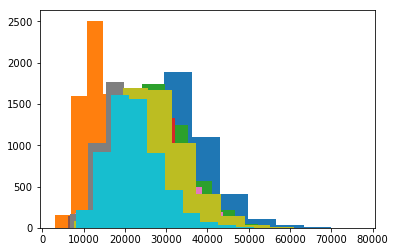

In [11]:
for y_val in range(10):
    plt.figure(i)
    index = y_train == y_val
    plt.hist(np.sum(X_train[index], axis=1))
plt.show()

In [12]:
valid_vectors = []
for i in range(28):
    for j in range(28):
        valid_vectors.append([i, j])

def get_white_group(btmap, pos_vec, group):
    group.append(pos_vec)
    neighbors = get_white_neighbors(btmap, pos_vec)
    for neighbor in neighbors:
        if neighbor not in group:
            group.append(neighbor)
            get_white_group(btmap, neighbor, group)
            
def get_white_neighbors(btmap, pos_vec):
    neighbors = []
    if pos_vec[0] >= 0 and pos_vec[0] < 28:
        if pos_vec[0] != 0:
            if btmap[pos_vec[0] - 1, pos_vec[1]] == 0:
                neighbors.append([pos_vec[0] - 1, pos_vec[1]])
        if pos_vec[0] != 27:
            if btmap[pos_vec[0] + 1, pos_vec[1]] == 0:
                neighbors.append([pos_vec[0] + 1, pos_vec[1]])
            
    if pos_vec[1] >= 0 and pos_vec[1] < 28:
        if pos_vec[1] != 0:
            if btmap[pos_vec[0], pos_vec[1] - 1] == 0:
                neighbors.append([pos_vec[0], pos_vec[1] - 1])
        if pos_vec[1] != 27:
            if btmap[pos_vec[0], pos_vec[1] + 1] == 0:
                neighbors.append([pos_vec[0], pos_vec[1] + 1])
    return neighbors
def get_btmap_vectors(vectors):
    btmap = np.zeros(shape=(28, 28))
    for v in vectors:
        btmap[v[0], v[1]] = 1
    return btmap

def get_white_groups(btmap = X_train_btmaps[0]):
    groups = []
    num_of_groups = 0
    for v in valid_vectors:
        if v not in groups and btmap[v[0], v[1]] == 0:
            group = []
            get_white_group(btmap, v, group)
            if group:
                if len(group) > 2:
                    num_of_groups = num_of_groups + 1
                groups.extend(group)
    return num_of_groups, groups

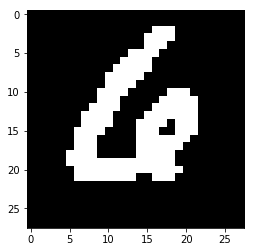

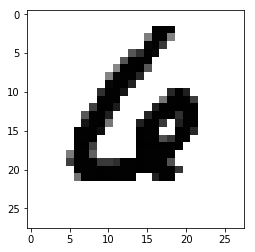

In [21]:
i = 40000
num_of_groups, groups = get_white_groups(X_train_btmaps[i])
plt.figure(1)
plt.imshow(get_btmap_vectors(groups), cmap="binary", aspect=1, interpolation="none")
plt.figure(2)
plt.imshow(X_train_btmaps[i], cmap="binary", aspect=1, interpolation="none")
plt.show()

In [22]:
num_of_groups

2

In [23]:
y[40000]

6.0